In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles


creamos nuestros datros artificiales, donde buscamos clasificar

Dos anilllos concentricos de datos

In [3]:
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

Resolucion del mapa de predicción

In [4]:
res=100

Coordenadas del mapa de prediccion

In [6]:
_x0 = np.linspace(-1.5,1.5, res)
_x1 = np.linspace(-1.5,1.5, res)

Input con cada combo de coordenadas del mapa ded predicción

In [12]:
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

Objeto vacio a 0.5 del  mapa de prediccion

In [13]:
_pY = np.zeros((res, res)) + 0.5

Visualización del mapa de prediccion

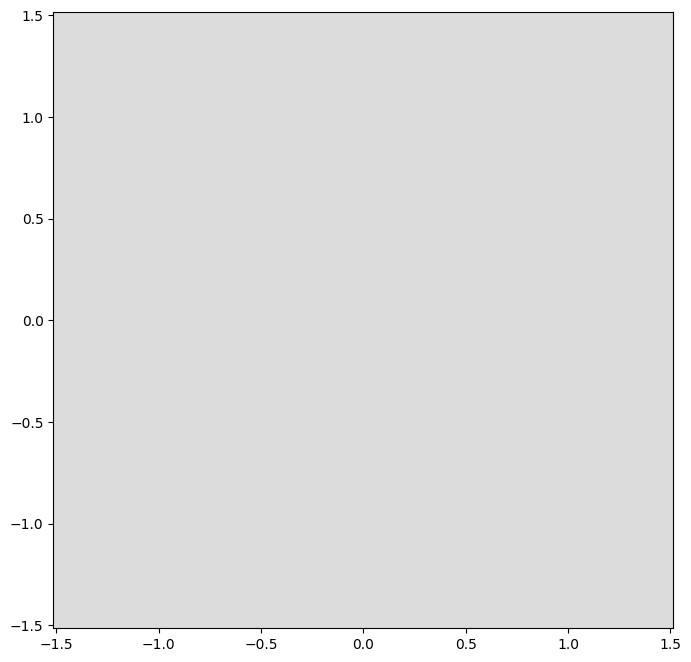

In [14]:
plt.figure(figsize = (8,8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

Visualización de la nube de datos

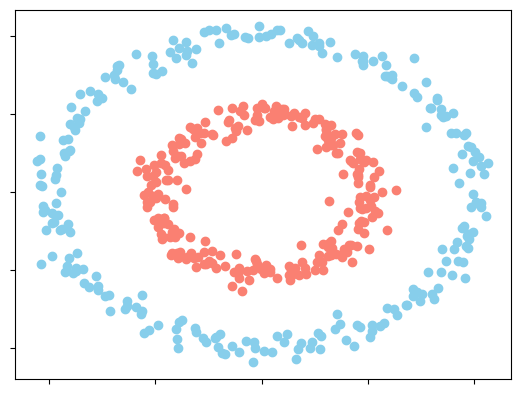

In [17]:
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

***TensorFlow***

Import TensorFlow

In [22]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from matplotlib import animation
from IPython.core.display import display, HTML


Instructions for updating:
non-resource variables are not supported in the long term


Definimos os puntos de entrada de la red, para la matrix X e Y

In [28]:
#Ix = tf.placeholder("float", shape=[None, X.shape[1]])
#Iy = tf.placeholder("float", shape=[None])

iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])


lr = 0.01 # lerning rate
nn = [2, 16, 8, 1] # número de neuronas en cada capa


Capa 1

In [29]:
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))



Capa 2

In [31]:
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

Capa 3

In [33]:
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

Vector de precondiciones de Y

In [35]:
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:,0]

Evaluacion de la condiciones

In [36]:
loss = tf.losses.mean_squared_error(pY, iY)

Definimos el optimizador de a red, para que minimice el error

Step 0 / 1000 - Loss =  0.33803546 - Acc = 0.54
Step 25 / 1000 - Loss =  0.30821198 - Acc = 0.58
Step 50 / 1000 - Loss =  0.29057688 - Acc = 0.604
Step 75 / 1000 - Loss =  0.2767218 - Acc = 0.616
Step 100 / 1000 - Loss =  0.26321176 - Acc = 0.618
Step 125 / 1000 - Loss =  0.2505027 - Acc = 0.63
Step 150 / 1000 - Loss =  0.23683602 - Acc = 0.65
Step 175 / 1000 - Loss =  0.22241883 - Acc = 0.676
Step 200 / 1000 - Loss =  0.20493537 - Acc = 0.698
Step 225 / 1000 - Loss =  0.19125839 - Acc = 0.718
Step 250 / 1000 - Loss =  0.18117774 - Acc = 0.73
Step 275 / 1000 - Loss =  0.1713449 - Acc = 0.752
Step 300 / 1000 - Loss =  0.16084819 - Acc = 0.792
Step 325 / 1000 - Loss =  0.14955048 - Acc = 0.878
Step 350 / 1000 - Loss =  0.13725747 - Acc = 0.934
Step 375 / 1000 - Loss =  0.12407044 - Acc = 0.96
Step 400 / 1000 - Loss =  0.11096365 - Acc = 0.976
Step 425 / 1000 - Loss =  0.09834852 - Acc = 0.98
Step 450 / 1000 - Loss =  0.08675026 - Acc = 0.984
Step 475 / 1000 - Loss =  0.07684377 - Acc = 0

ValueError: cannot reshape array of size 500 into shape (100,100)

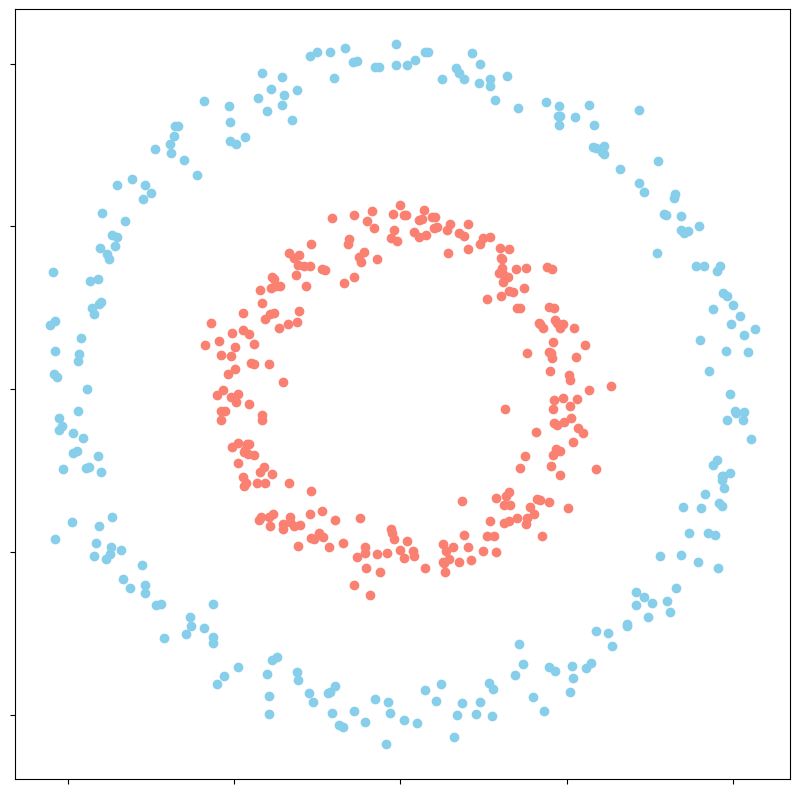

In [55]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps = 1000 # Número de ciclos de entrenamiento.
iPY = [] # Aqui guardaremos la evolucién de las predicción, para la animación.

with tf.Session() as sess:
  #inicializamos todos los parametros de la red de parametrdo de las matrices W y b
  sess.run(tf.global_variables_initializer())
  #iteramos n pases de entrenamento
  for step in range(n_steps):
    #evaluamos el optimizador, a la funcion d4e coste y al tensor de salida pY
    #la evaluacion del optimizador producira el ntrenamiento de la red
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    #cada 25 iteraciones, imprimimos metrcas
    if step % 25 == 0:
      acc = np.mean(np.round(_pY) == Y)
      #Impresion de metricas
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      #optenemos predicciones de cada punto de nuestro mapa de prediccion pX
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))
      #Y  lo guardamos para animar la visualizacion
    iPY.append(_pY)

#---- CÓDIGO ANIMACIÓN ----- #
ims = []
fig = plt. figure(figsize=(10, 10))
print("--- Generando animación ---")
for fr in range(len(iPY)):
  #im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
    # Check the shape of the data and reshape if necessary
  if len(iPY[fr].shape) == 1:
    _pY_reshaped = iPY[fr].reshape((res, res))  # Assuming 'res' is defined as the desired grid size
  else:
    _pY_reshaped = iPY[fr]
  # visualizacién de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")
  # plt.title("Resultado Clasificación)
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML (ani.to_html5_video())

# ***Keras***

In [56]:
import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.legacy import SGD as LegacySGD
from IPython.core.display import display, HTML

lr = 0.01 # learning rate
nn = [2, 16, 8, 1] # nimero de neuronas por capa.

# Creamos el objeto que contendra a nuestra red neuronal, como

# secuencia de capas.

model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos 1a capa 2
l2 = model .add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos 1a capa 3

l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la funcidn de coste y el optimizador.
model.compile(loss='mse', optimizer = LegacySGD(learning_rate=0.05), metrics=['acc'])
# Y entrenamos al modelo. Los callbacks

model.fit(X, Y, epochs=100)

Train on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 660us/sample - loss: 0.2363 - acc: 0.5000
Epoch 2/100
500/500 [==============================] - 0s 194us/sample - loss: 0.2348 - acc: 0.5000
Epoch 3/100
500/500 [==============================] - 0s 184us/sample - loss: 0.2333 - acc: 0.5460
Epoch 4/100
500/500 [==============================] - 0s 275us/sample - loss: 0.2318 - acc: 0.6440
Epoch 5/100
500/500 [==============================] - 0s 199us/sample - loss: 0.2303 - acc: 0.6680
Epoch 6/100
500/500 [==============================] - 0s 281us/sample - loss: 0.2289 - acc: 0.6640
Epoch 7/100
500/500 [==============================] - 0s 98us/sample - loss: 0.2275 - acc: 0.6800
Epoch 8/100
500/500 [==============================] - 0s 75us/sample - loss: 0.2261 - acc: 0.6780
Epoch 9/100
500/500 [==============================] - 0s 86us/sample - loss: 0.2247 - acc: 0.7020
Epoch 10/100
500/500 [==============================] - 0s 82us/sample - loss: 0.2

# scikit ***learn***

In [57]:
import sklearn as sk
import sklearn.neural_network
from IPython.core.display import display, HTML

lr = 0.01 # learning rate
nn = [2, 16, 8, 1] # número de neuronas por Capa.

# Creamos el objeto del modelo de red neuronal multicapa.

clf = sk.neural_network.MLPRegressor(solver='sgd',learning_rate_init=lr,hidden_layer_sizes=tuple(nn[1:]),verbose=True,n_iter_no_change=1000,batch_size=64)

# Y lo entrenamos con nuestro datos.

clf.fit(X, Y)

Iteration 1, loss = 0.47405949
Iteration 2, loss = 0.21744534
Iteration 3, loss = 0.13663513
Iteration 4, loss = 0.14260033
Iteration 5, loss = 0.13353052
Iteration 6, loss = 0.12887891
Iteration 7, loss = 0.12820990
Iteration 8, loss = 0.12731592
Iteration 9, loss = 0.12655075
Iteration 10, loss = 0.12631926
Iteration 11, loss = 0.12586609
Iteration 12, loss = 0.12541345
Iteration 13, loss = 0.12512650
Iteration 14, loss = 0.12500246
Iteration 15, loss = 0.12459035
Iteration 16, loss = 0.12428316
Iteration 17, loss = 0.12403463
Iteration 18, loss = 0.12379411
Iteration 19, loss = 0.12352373
Iteration 20, loss = 0.12328345
Iteration 21, loss = 0.12298854
Iteration 22, loss = 0.12290412
Iteration 23, loss = 0.12240173
Iteration 24, loss = 0.12203507
Iteration 25, loss = 0.12170328
Iteration 26, loss = 0.12132615
Iteration 27, loss = 0.12102094
Iteration 28, loss = 0.12056187
Iteration 29, loss = 0.12014654
Iteration 30, loss = 0.11959475
Iteration 31, loss = 0.11901247
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)